# Simulation Playground Notebook
This notebook is designed as a easy einterface to call the functions that we have defined

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import torch.optim as optim
import torch.nn as nn
import torch

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data, preprocess_data
from models.LCModels import LCNECortexFitter, FeedForwardNN, RecurrentNet, LCNECortexLSTM
from models.LCGadgetModel import LSTMGadget
from utils import perform_pca_and_plot

# Data Preparation
Let's prepare some data first to fit our model. We are specifically using ["Locus coeruleus activity strengthens prioritized memories under arousal"](https://openneuro.org/datasets/ds002011/versions/1.0.0) dataset fror now.

In [2]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

Let's preprocess our data first

In [3]:
X, Y, X_tensor, Y_tensor, scaler_X, scaler_Y, df_clean = preprocess_data(df_behavior)

X Shape: torch.Size([1699, 7]), Y Shape: torch.Size([1699])
Y Min: -1.0, Y Max: 1.0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Training

In [5]:
from train import train_feed_forward_nn, train_vanilla_rnn, train_vanilla_lc_model, train_lstm_lc_model, train_neural_gadget_model
from eval import evaluate_model

## Fully Connected Neural Network

To illustrate our idea, we want to train 2 models from math and computer science, which is our vanilla feed forward networks and an recurrent networks.

Epoch 0, Loss: 0.10475419461727142
Epoch 100, Loss: 0.04755151644349098
Epoch 200, Loss: 0.0461004413664341
Epoch 300, Loss: 0.04456719011068344
Epoch 400, Loss: 0.04329501464962959
Epoch 500, Loss: 0.042356185615062714
Epoch 600, Loss: 0.040828775614500046
Epoch 700, Loss: 0.04086270183324814
Epoch 800, Loss: 0.039356037974357605
Epoch 900, Loss: 0.038826506584882736
Epoch 1000, Loss: 0.038717254996299744
Epoch 1100, Loss: 0.03852209821343422
Epoch 1200, Loss: 0.03819239139556885
Epoch 1300, Loss: 0.037436388432979584
Epoch 1400, Loss: 0.03730408847332001
Epoch 1500, Loss: 0.03673717752099037
Epoch 1600, Loss: 0.03693166747689247
Epoch 1700, Loss: 0.0366845540702343
Epoch 1800, Loss: 0.03665260970592499
Epoch 1900, Loss: 0.036926548928022385
Evaluating Model: FeedForwardNN


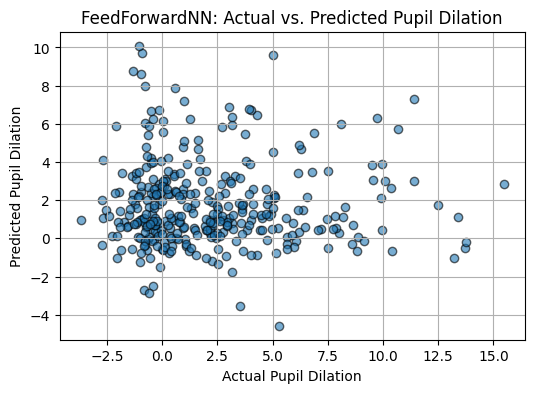

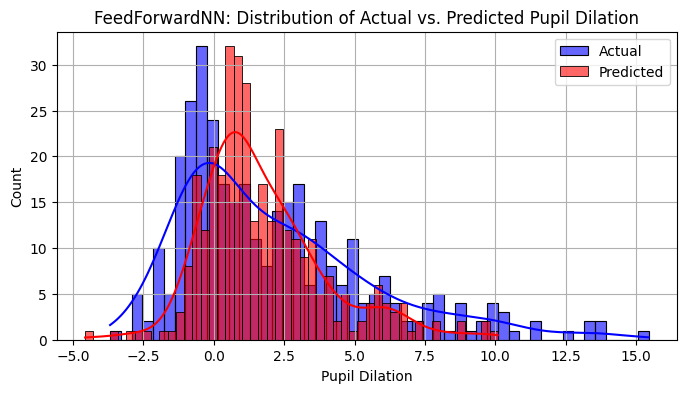

FeedForwardNN - Pearson Correlation: -0.0180


In [6]:
model_ff = train_feed_forward_nn(X_train, Y_train,epochs=2000)
evaluate_model(model_ff, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Recurent Neural Networks

We will  do the same thing with an recurrent neural network

X_rnn Shape: torch.Size([1359, 1, 7]), Y_rnn Shape: torch.Size([1359, 1])
Epoch 0, Loss: 0.1513
Epoch 100, Loss: 0.0524
Epoch 200, Loss: 0.0501
Epoch 300, Loss: 0.0493
Epoch 400, Loss: 0.0489
Epoch 500, Loss: 0.0483
Epoch 600, Loss: 0.0480
Epoch 700, Loss: 0.0478
Epoch 800, Loss: 0.0476
Epoch 900, Loss: 0.0474
Epoch 1000, Loss: 0.0470
Epoch 1100, Loss: 0.0468
Epoch 1200, Loss: 0.0466
Epoch 1300, Loss: 0.0465
Epoch 1400, Loss: 0.0463
Epoch 1500, Loss: 0.0461
Epoch 1600, Loss: 0.0463
Epoch 1700, Loss: 0.0459
Epoch 1800, Loss: 0.0457
Epoch 1900, Loss: 0.0457
Evaluating Model: RecurrentNet


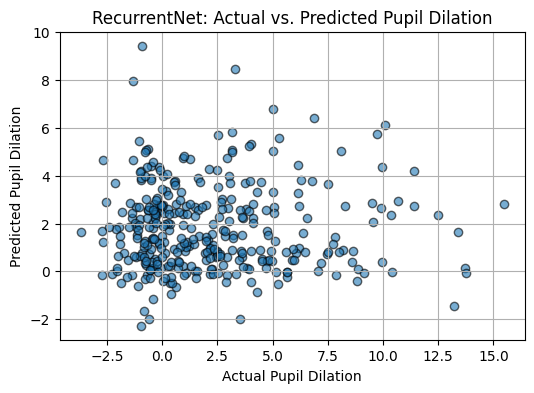

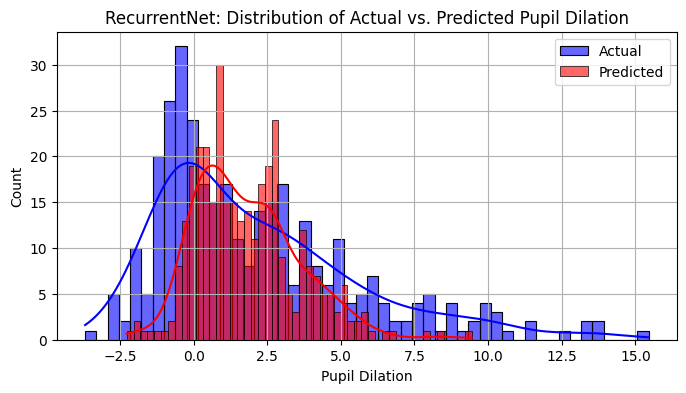

RecurrentNet - Pearson Correlation: 0.0080


In [7]:
model_rnn = train_vanilla_rnn(X_train, Y_train, epochs=2000)
evaluate_model(model_rnn, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Vanilla LCNECortex Model

Now coming to our customized LCNECortex model

Epoch 0, Loss: 0.7445433139801025
Epoch 100, Loss: 0.031054483726620674


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 200, Loss: 0.03691929206252098
Epoch 300, Loss: 0.022673968225717545
Epoch 400, Loss: 0.024182310327887535
Epoch 500, Loss: 0.03167561814188957
Epoch 600, Loss: 0.02844404987990856
Epoch 700, Loss: 0.020144453272223473
Epoch 800, Loss: 0.021044688299298286
Epoch 900, Loss: 0.038192808628082275
Epoch 1000, Loss: 0.023586096242070198
Epoch 1100, Loss: 0.04791298881173134
Epoch 1200, Loss: 0.028426239266991615
Epoch 1300, Loss: 0.022330649197101593
Epoch 1400, Loss: 0.03154315799474716
Epoch 1500, Loss: 0.034520186483860016
Epoch 1600, Loss: 0.01704591140151024
Epoch 1700, Loss: 0.026883205398917198
Epoch 1800, Loss: 0.03767020255327225
Epoch 1900, Loss: 0.036674827337265015
Evaluating Model: LCNECortexFitter


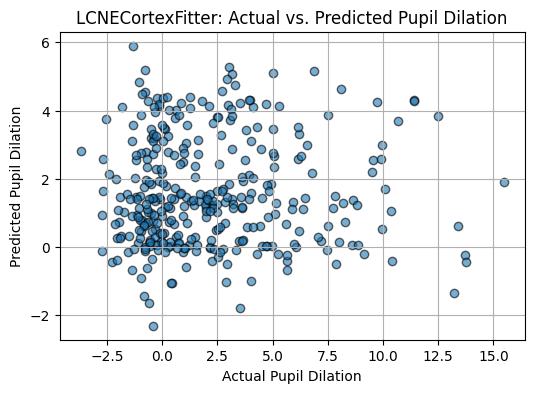

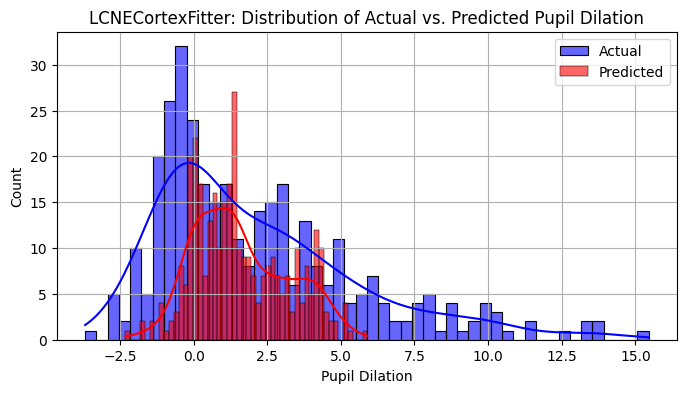

LCNECortexFitter - Pearson Correlation: 0.0190


In [8]:
model_lc_vanilla = train_vanilla_lc_model(X_train, Y_train, epochs=2000)
evaluate_model(model_lc_vanilla, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM LCNECortex Model

Epoch 0, Loss: 0.06516765058040619


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/nn/modules/loss.py:1040: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 100, Loss: 0.06159774214029312
Epoch 200, Loss: 0.04613053426146507
Epoch 300, Loss: 0.04911214858293533
Epoch 400, Loss: 0.10116488486528397
Epoch 500, Loss: 0.056683920323848724
Epoch 600, Loss: 0.04398055002093315
Epoch 700, Loss: 0.05703049153089523
Epoch 800, Loss: 0.0751754641532898
Epoch 900, Loss: 0.08191917836666107
Epoch 1000, Loss: 0.07054126262664795
Epoch 1100, Loss: 0.05722169578075409
Epoch 1200, Loss: 0.04782252013683319
Epoch 1300, Loss: 0.055694807320833206
Epoch 1400, Loss: 0.0915050208568573
Epoch 1500, Loss: 0.05394062027335167
Epoch 1600, Loss: 0.1006648987531662
Epoch 1700, Loss: 0.045991893857717514
Epoch 1800, Loss: 0.06997048109769821
Epoch 1900, Loss: 0.07525961846113205
Evaluating Model: LCNECortexLSTM


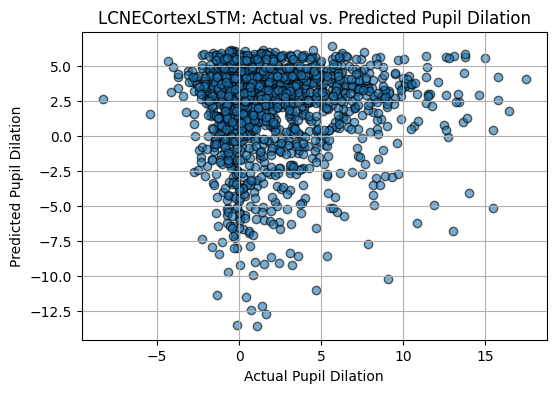

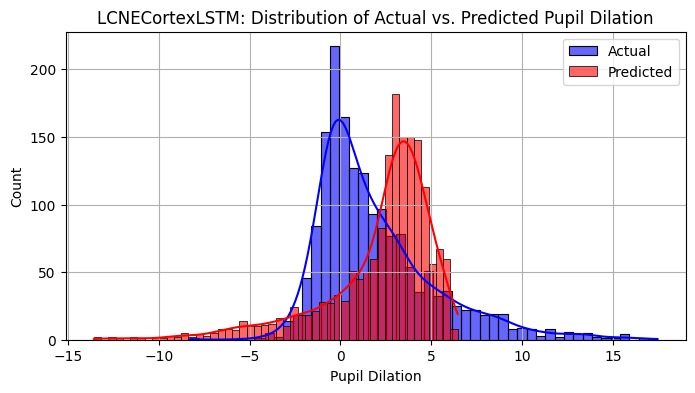

LCNECortexLSTM - Pearson Correlation: 0.0048


In [9]:
model_lc_lstm = train_lstm_lc_model(X_train, Y_train, epochs=2000)
evaluate_model(model_lc_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Gadget Model

Epoch 0, Loss: 0.103556, LR: 0.001000
Epoch 100, Loss: 0.114435, LR: 0.000000


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 200, Loss: 0.100776, LR: 0.000000
Epoch 300, Loss: 0.106214, LR: 0.000000
Epoch 400, Loss: 0.107729, LR: 0.000000
Epoch 500, Loss: 0.123996, LR: 0.000000
Epoch 600, Loss: 0.092398, LR: 0.000000
Epoch 700, Loss: 0.096226, LR: 0.000000
Epoch 800, Loss: 0.107630, LR: 0.000000
Epoch 900, Loss: 0.099105, LR: 0.000000
Epoch 1000, Loss: 0.104456, LR: 0.000000
Epoch 1100, Loss: 0.117857, LR: 0.000000
Epoch 1200, Loss: 0.098777, LR: 0.000000
Epoch 1300, Loss: 0.145908, LR: 0.000000
Epoch 1400, Loss: 0.096797, LR: 0.000000
Epoch 1500, Loss: 0.095838, LR: 0.000000
Epoch 1600, Loss: 0.092537, LR: 0.000000
Epoch 1700, Loss: 0.116941, LR: 0.000000
Epoch 1800, Loss: 0.097580, LR: 0.000000
Epoch 1900, Loss: 0.095771, LR: 0.000000
Training complete!
Evaluating Model: LSTMGadget


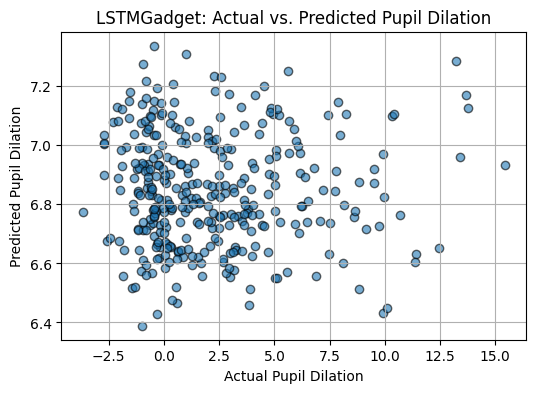

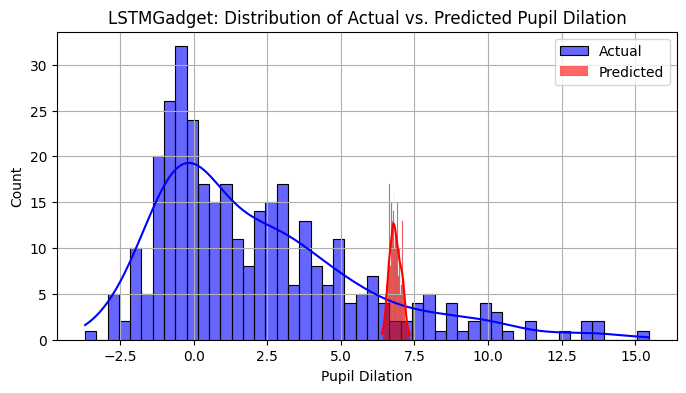

LSTMGadget - Pearson Correlation: -0.0019


In [10]:
model_gadget = train_neural_gadget_model(X_train, Y_train, epochs=2000)
evaluate_model(model_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

# Analysis

In [11]:
from analysis import pca_gadget, pca_lcne_lstm, pca_feed_forward, pca_lcne, firing_lcne

## Feed-Forward Neural Networks

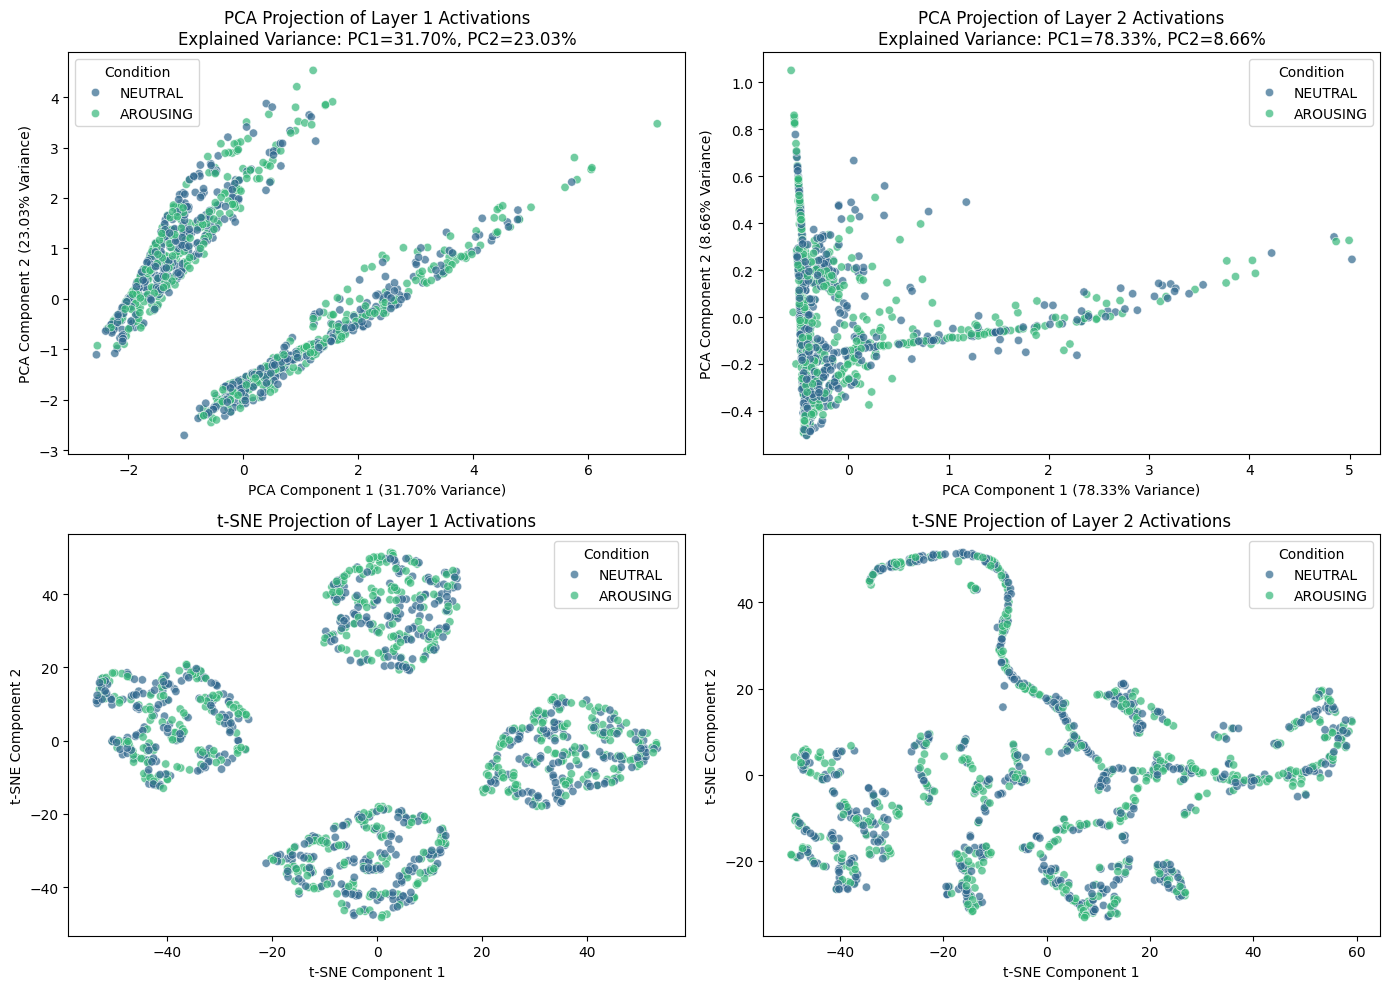

In [12]:
pca_feed_forward(model_ff, X_tensor, df_behavior)

## LCNECortex Model

We will see that, though  under fitted with the real data, there are some structureness to the data that we can play around with since we injected mechanistic insights into it.

Text(0.5, 1.0, 'Cortex Activation Distribution')

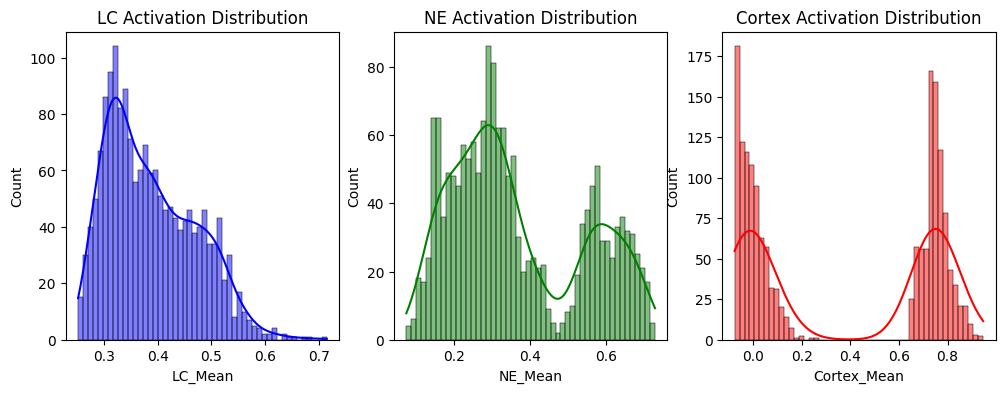

In [13]:
with torch.no_grad():
    prev_LC = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)
    prev_Cortex = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)

    LC_act, NE_act, C_act, Pupil_pred, LC_raw, NE_raw, C_raw = model_lc_vanilla(X_tensor, prev_LC, prev_Cortex, return_activations=True)

act_lc = LC_act.cpu().numpy()
act_ne = NE_act.cpu().numpy()
act_cortex = C_act.cpu().numpy()

df_activations = pd.DataFrame({
    'LC_Mean': act_lc.mean(axis=1),
    'NE_Mean': act_ne.mean(axis=1),
    'Cortex_Mean': act_cortex.mean(axis=1),
    'PupilPred': Pupil_pred.cpu().numpy().squeeze(),
    'ActualPupil': df_clean['Event_PupilDilation'].values  # Ensure this aligns with X_tensor
})

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_activations['LC_Mean'], kde=True, bins=50, color='blue')
plt.title("LC Activation Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_activations['NE_Mean'], kde=True, bins=50, color='green')
plt.title("NE Activation Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_activations['Cortex_Mean'], kde=True, bins=50, color='red')
plt.title("Cortex Activation Distribution")

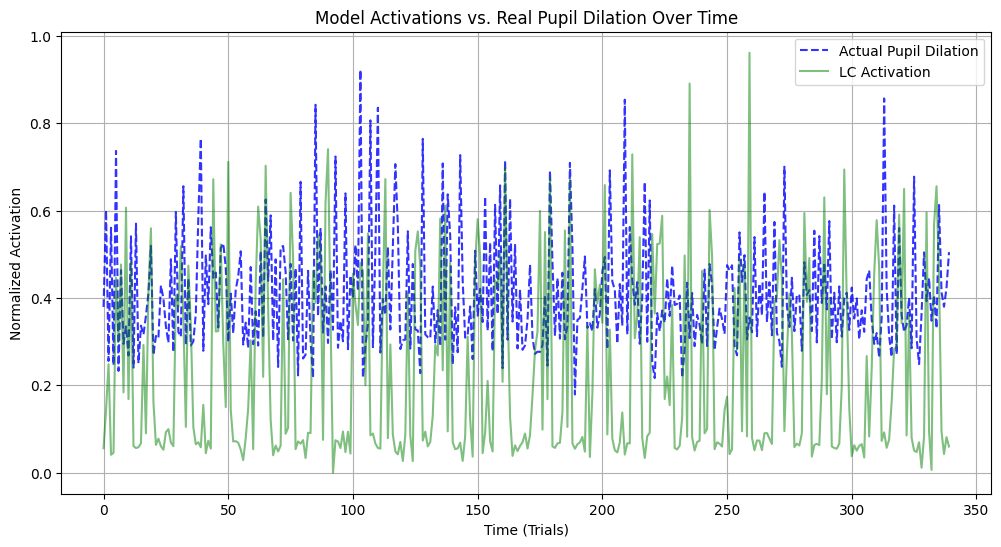

Correlation with Actual Pupil Dilation:
LC Activation: 0.045
NE Activation: -0.009
Cortex Activation: -0.029
Predicted Pupil Dilation: 0.019


In [14]:
firing_lcne(model_lc_vanilla, X_test, df_clean)

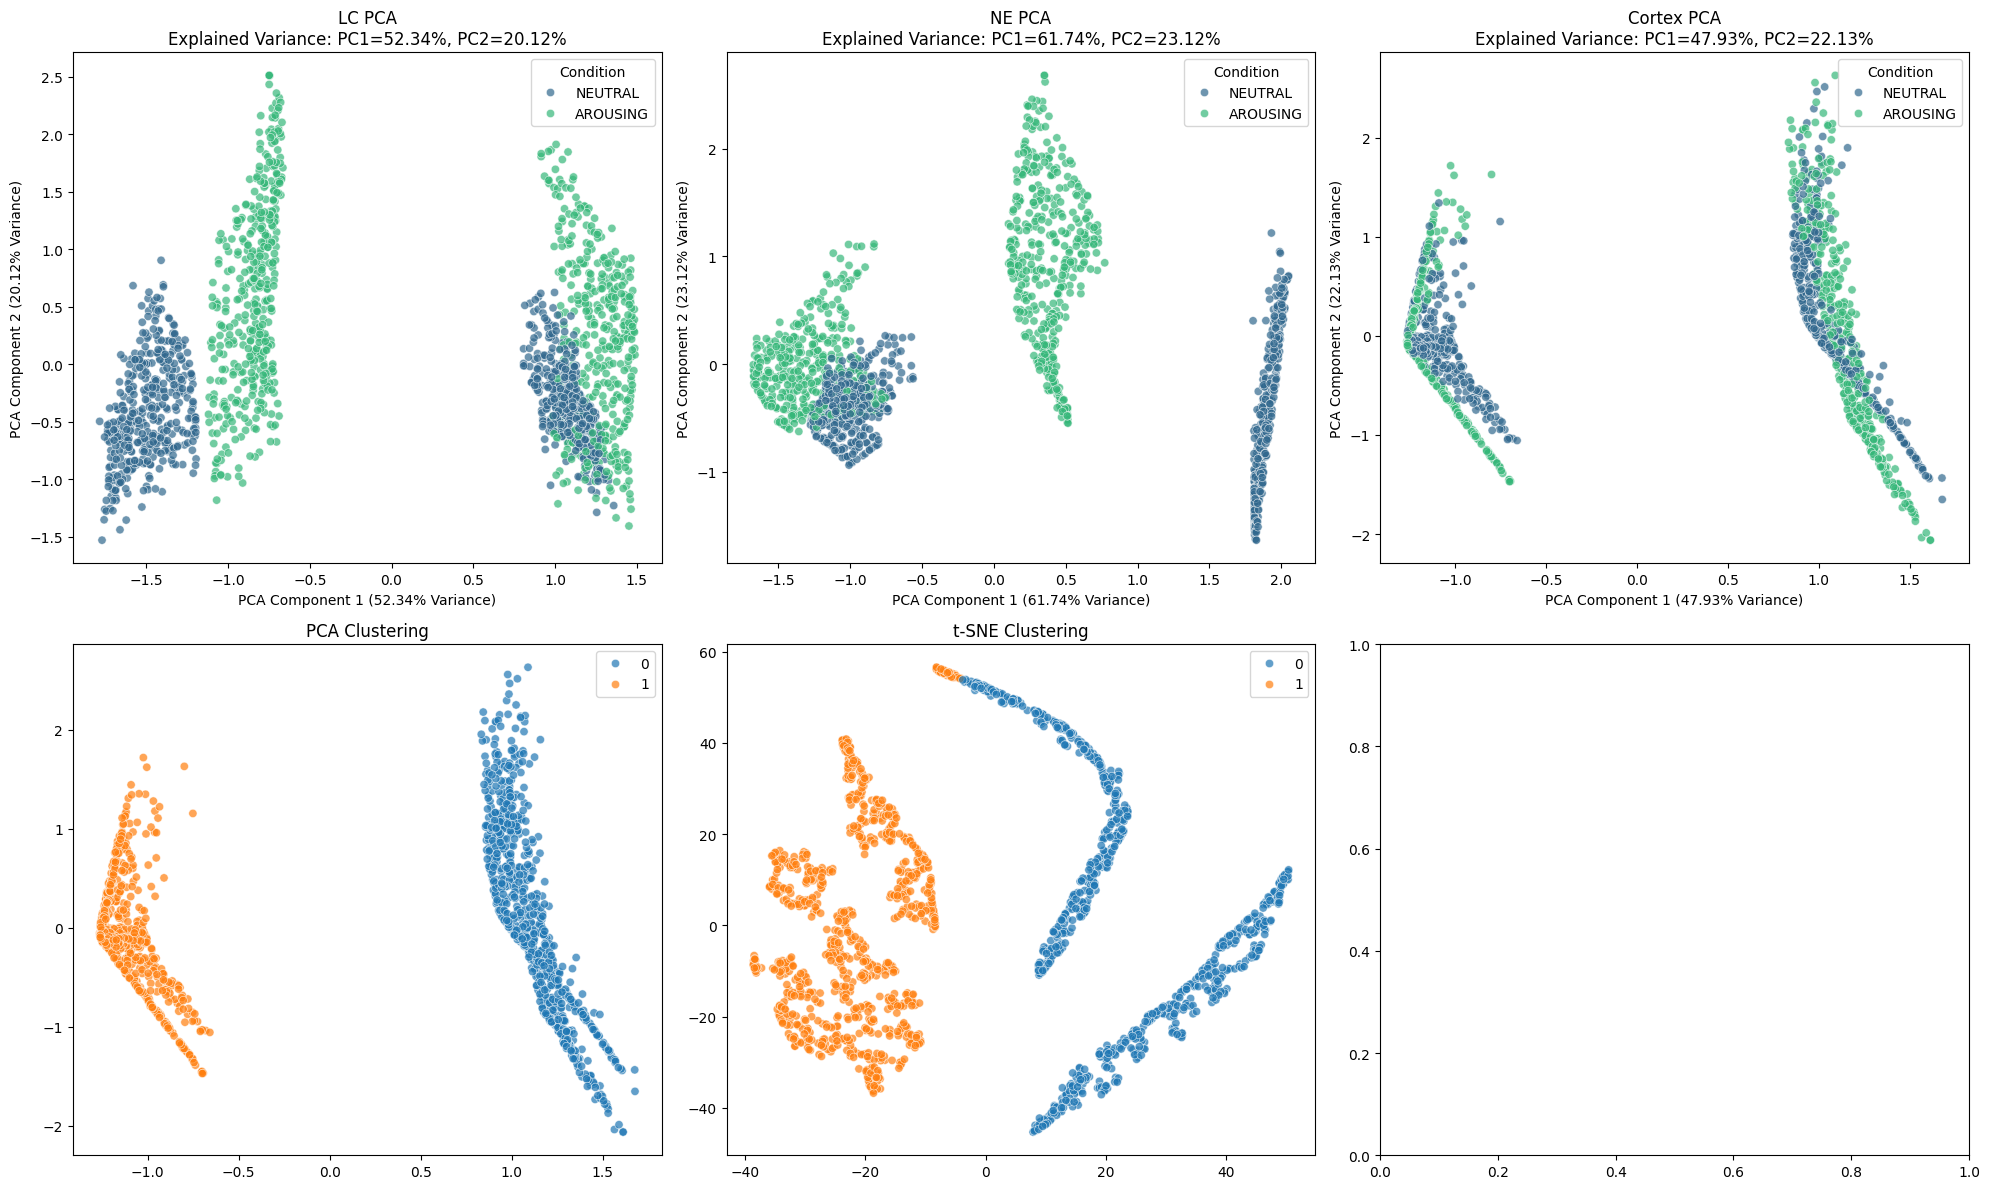

In [15]:
pca_lcne(model_lc_vanilla, X_tensor, df_clean)

## LSTM LCNECortex Model

(1699,) (1699,) (1699, 8)


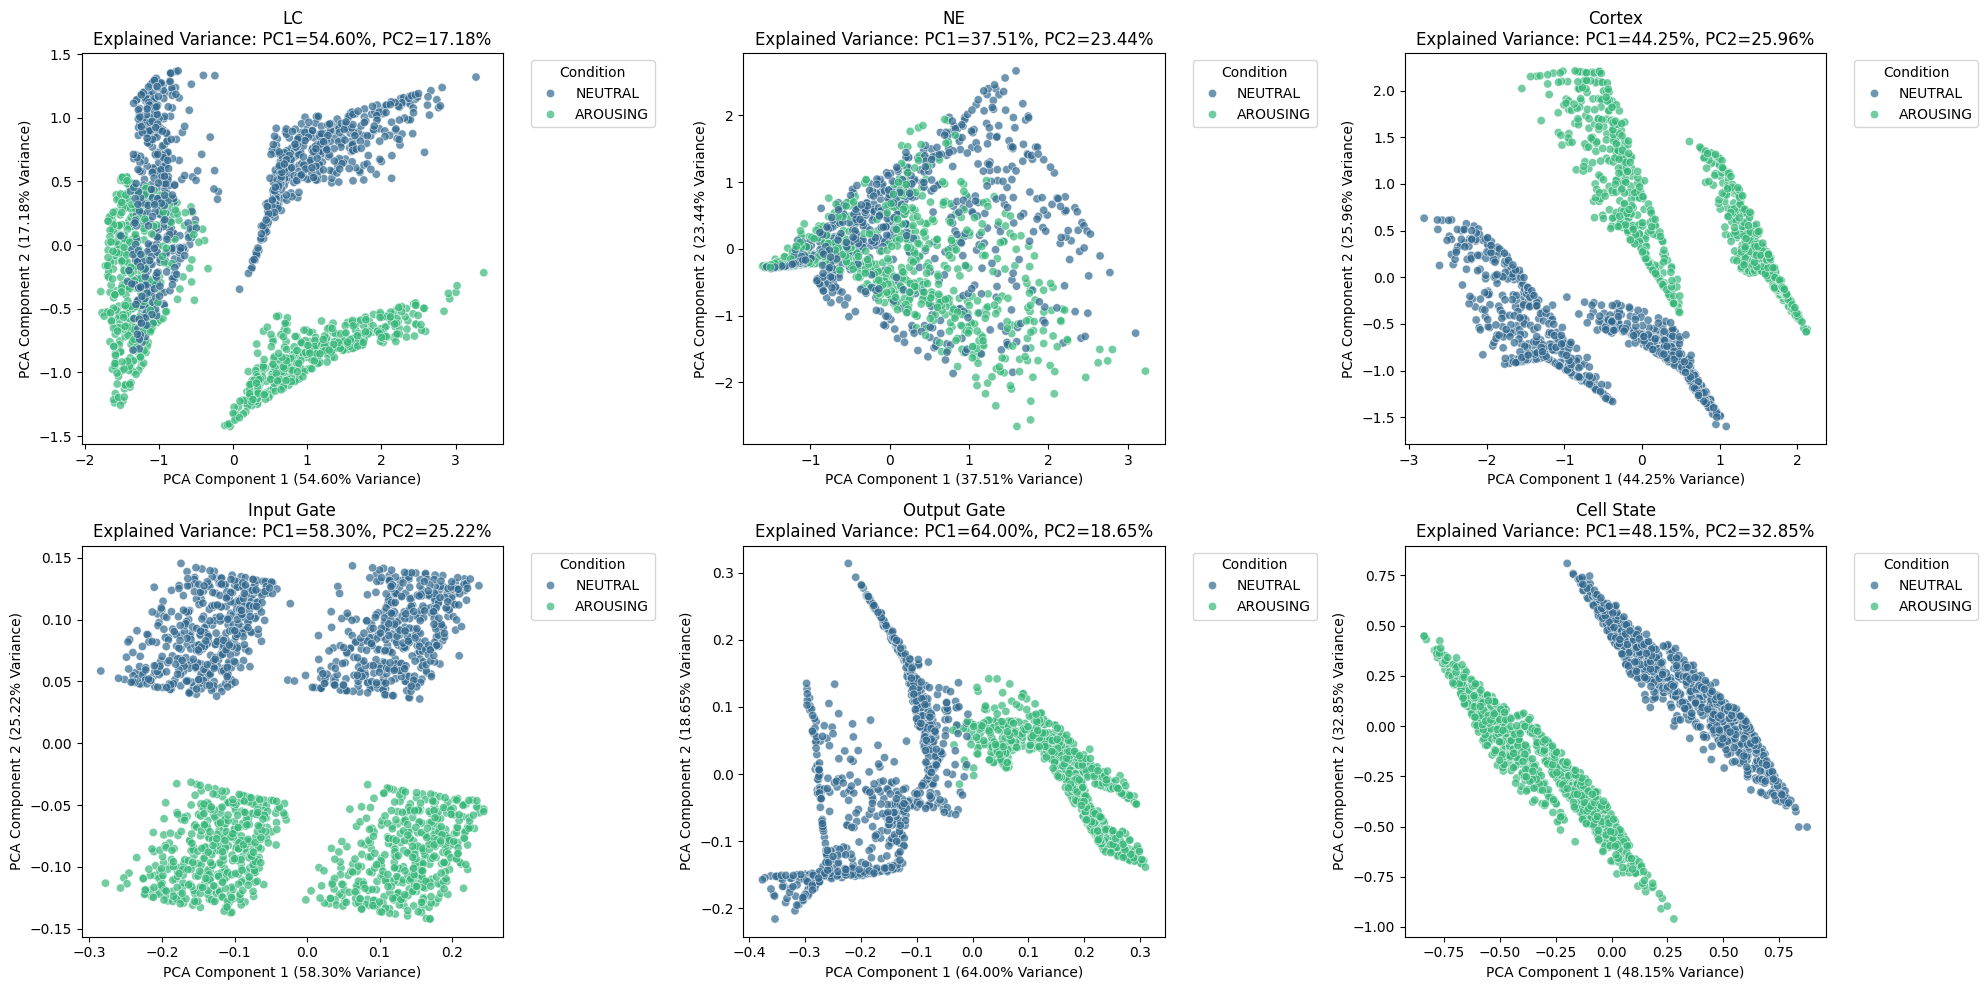

In [16]:
pca_lcne_lstm(model_lc_lstm, X_tensor, df_clean)

## LSTM Gadget Analysis

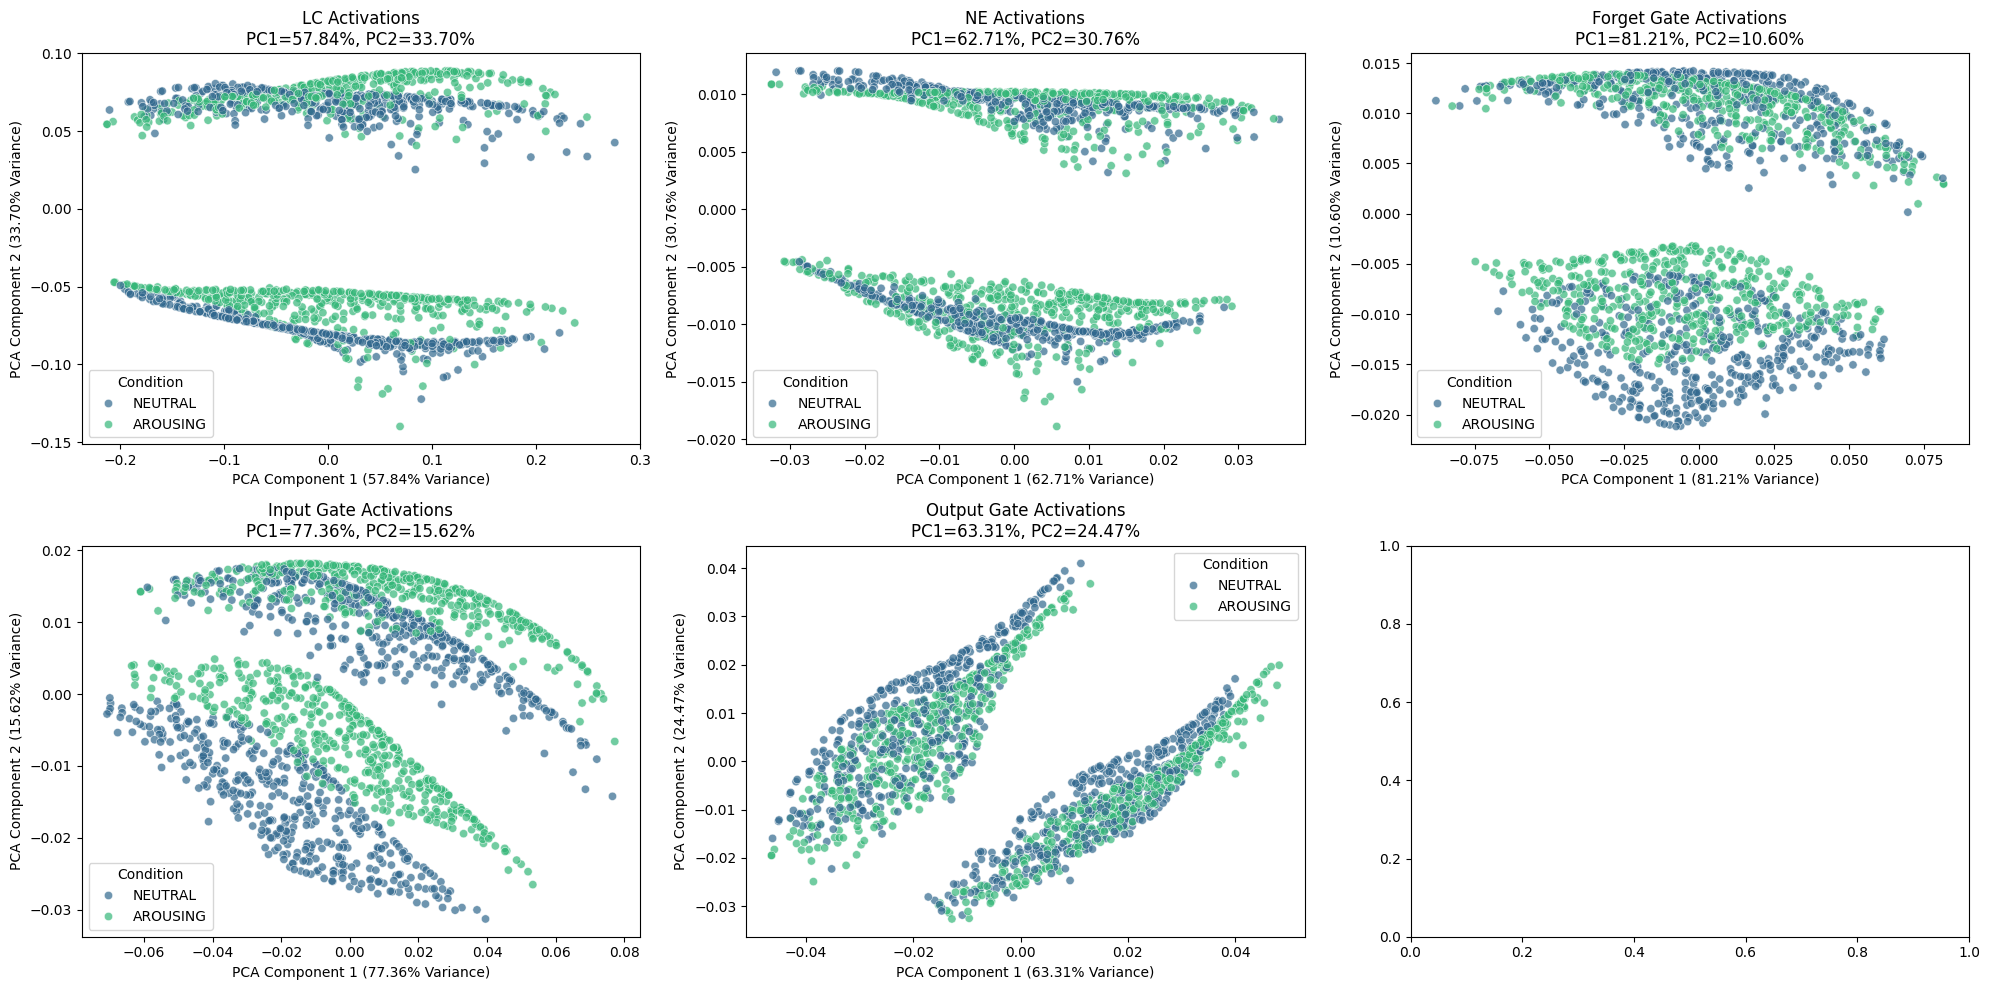

Pearson Correlation with Actual Pupil Dilation:
LC Activation: -0.305
NE Activation: -0.166
Forget Gate: 0.005
Input Gate: -0.296
Output Gate: 0.095
Predicted Pupil Dilation: -0.173


In [17]:
pca_gadget(model_gadget, X_tensor, df_clean)